# World Happiness Report - Forge Project

Background and motivation: <br> In this project, I was interested in finding insights about how the world's happiness levels changed during the COVID-19 pandemic. The aim of this dataset was to essentially quantify the happiness levels of 140+ countries using various factors such as their GDP per capita, life expectancy, freedom to make life choices, etc. Specifically, I am interested in finding out if there was a significant drop in happiness in 2020, when COVID hit, and if people felt that their freedom to make life choices decreased substantially (due to quarantine, isolation, etc.).

Link to dataset: https://www.kaggle.com/datasets/mathurinache/world-happiness-report-20152021?resource=download&select=2019.csv

In [639]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

## Data cleaning

#### Initial steps: 
1. Read in CSV files <br>
2. Take a look at the datasets, figure out what columns I want to use and their names <br>
3. Turn them into DataFrames for easy manipulation and clean them up wherever needed 

In [54]:
yr19 = pd.read_csv('2019.csv')
yr20 = pd.read_csv('2020.csv')
yr21 = pd.read_csv('2021.csv')

In [162]:
yr19.head(5)
# Taking a quick look 

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [74]:
yr20.head(5)
# Taking a quick look 

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [73]:
yr21.head(5)
# Taking a quick look 

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [181]:
df19 = pd.DataFrame(yr19, columns=['Country or region', 'Score', 'Freedom to make life choices'])
df20 = pd.DataFrame(yr20, columns=['Country name', 'Ladder score', 'Freedom to make life choices'])
df21 = pd.DataFrame(yr21, columns=['Country name', 'Ladder score', 'Freedom to make life choices'])
# Getting only the columns I want and putting them into DataFrames

#### Now time to clean up the DataFrames 

In [188]:
df19.rename(columns={"Country or region": "Country_name", "Freedom to make life choices": "Freedom"}, inplace = True)
df20.rename(columns={"Country name": "Country_name", "Ladder score": "Score", "Freedom to make life choices": "Freedom"}, inplace = True)
df21.rename(columns={"Country name": "Country_name", "Ladder score": "Score", "Freedom to make life choices": "Freedom"}, inplace = True)
# Making sure all three datasets have the same column names with underscores for ease

In [189]:
index19 = pd.Index(range(1, len(df19) + 1, 1))
df19 = df19.set_index(index19)
index20 = pd.Index(range(1, len(df20) + 1, 1))
df20 = df20.set_index(index20)
index21 = pd.Index(range(1, len(df21) + 1, 1))
df21 = df21.set_index(index21)
# Adjusting the indexes

In [190]:
df19.index.name = 'Happiness Rank'
df20.index.name = 'Happiness Rank'
df21.index.name = 'Happiness Rank'
# Changing the index to be the overall rank

In [191]:
df19.tail(3)
# Checking everything is good so far

,Country_name,Score,Freedom
Happiness Rank,,,
154,Afghanistan,3.203,0.000
155,Central African Republic,3.083,0.225
156,South Sudan,2.853,0.010


In [192]:
df20.tail(3)
# Checking everything is good so far

,Country_name,Score,Freedom
Happiness Rank,,,
151,Zimbabwe,3.2992,0.711458
152,South Sudan,2.8166,0.451314
153,Afghanistan,2.5669,0.396573


In [193]:
df21.tail(3)
# Checking everything is good so far

,Country_name,Score,Freedom
Happiness Rank,,,
147,Rwanda,3.415,0.897
148,Zimbabwe,3.145,0.677
149,Afghanistan,2.523,0.382


#### Note: the three datasets I picked are not the same lengths- some countries are not included in 2021, for example. For this reason I will drop those countries that are not in all three datasets for the sake of comparison.

In [358]:
common = df19.merge(df20, on=["Country_name"])
common.head(3)

,Country_name,Score_x,Freedom_x,Score_y,Freedom_y
0,Finland,7.769,0.596,7.8087,0.949172
1,Denmark,7.600,0.592,7.6456,0.951444
2,Norway,7.554,0.603,7.4880,0.955750


In [359]:
# Filtering rows of df19
result = df19[~df19.Country_name.isin(common.Country_name)]
result

,Country_name,Score,Freedom
Happiness Rank,,,
29,Qatar,6.374,0.555
95,Bhutan,5.082,0.457
112,Somalia,4.668,0.559
149,Syria,3.462,0.013


In [360]:
result2 = df20[~df20.Country_name.isin(common.Country_name)]
result2

,Country_name,Score,Freedom
Happiness Rank,,,
87,Maldives,5.1976,0.853963


In [361]:
# Display result
print("Rows of df19 that are not present in df20 are:\n",result,"\n")

# Display result2
print("Rows of df20 that are not present in df19 are:\n",result2)

Rows of df19 that are not present in df20 are:
                Country_name  Score  Freedom
Happiness Rank                             
29                    Qatar  6.374    0.555
95                   Bhutan  5.082    0.457
112                 Somalia  4.668    0.559
149                   Syria  3.462    0.013 

Rows of df20 that are not present in df19 are:
                Country_name   Score   Freedom
Happiness Rank                               
87                 Maldives  5.1976  0.853963


In [357]:
df19['Country_name'] = df19['Country_name'].replace(['Trinidad & Tobago'], 'Trinidad and Tobago')
df20['Country_name'] = df20['Country_name'].replace(['Taiwan Province of China'], 'Taiwan')
df20['Country_name'] = df20['Country_name'].replace(['Hong Kong S.A.R. of China'], 'Hong Kong')
df20['Country_name'] = df20['Country_name'].replace(['North Cyprus'], 'Northern Cyprus')
df20['Country_name'] = df20['Country_name'].replace(['Macedonia'], 'North Macedonia')
# Making country naming consistent between DataFrames

In [409]:
# After this check I went back up and re-ran the cells that defined 'common', 'result', and 'result2', 
# keeping in mind that only 5 countries should now show up in either df19 or df20: Qatar, Bhutan, Somalia, Syria (df19) 
# and Maldives (df20)
# Update: it worked
# From doing this I determined that I want to drop a couple countries from df19 and one from df20, 
# so that the DataFrames are the same.

In [404]:
# The math works, because the difference in the rows above is 3 (4-1). The others were just due to naming issues, 
# so I fixed those.

In [376]:
newdf20 = df20.drop(df20.index[[86]])
newdf19 = df19.drop(df19.index[[28, 94, 111, 148]])

In [372]:
# Check to make sure DataFrames are the same length now
def lengthcheck(df1, df2):
    if len(df1) == len(df2):
        return True
    else:
        return False

In [374]:
lengthcheck(newdf19, newdf20)

True

In [375]:
# Success; DataFrames are now the same length.

In [382]:
df20.iloc[[86, 87]]

,Country_name,Score,Freedom
Happiness Rank,,,
87,Maldives,5.1976,0.853963
88,Congo (Brazzaville),5.1944,0.719059


In [383]:
newdf20.iloc[[86]] # Quick check to make sure this is different now; should be Congo (Brazzaville), NOT Maldives

,Country_name,Score,Freedom
Happiness Rank,,,
88,Congo (Brazzaville),5.1944,0.719059


#### Now do the same thing again, comparing df19 and df21. No need to do df20 and df21, b/c now df19 and df20 are the same.
##### (Will make adjustments later if additional things need to be removed)

In [399]:
len(df21) 
# This tells me that some things will need to be removed from df19 and df20 -- in retrospect I would have done this 
# comparison first, since df21 is the shortest DataFrame.

149

In [406]:
## CHANGE ME 
common2 = newdf19.merge(df21, on=["Country_name"])
result = newdf19[~newdf19.Country_name.isin(common2.Country_name)]
result

,Country_name,Score,Freedom
Happiness Rank,,,
39,Trinidad and Tobago,6.192,0.489
127,Congo (Kinshasa),4.418,0.269
155,Central African Republic,3.083,0.225
156,South Sudan,2.853,0.010


In [407]:
result2 = df21[~df21.Country_name.isin(common2.Country_name)]
result2

,Country_name,Score,Freedom
Happiness Rank,,,
89,Maldives,5.198,0.854


In [408]:
# Display result
print("Rows of newdf19 that are not present in df21 are:\n",result,"\n")

# Display result2
print("Rows of df21 that are not present in newdf19 are:\n",result2)

Rows of newdf19 that are not present in df21 are:
                             Country_name  Score  Freedom
Happiness Rank                                          
39                   Trinidad and Tobago  6.192    0.489
127                     Congo (Kinshasa)  4.418    0.269
155             Central African Republic  3.083    0.225
156                          South Sudan  2.853    0.010 

Rows of df21 that are not present in newdf19 are:
                Country_name  Score  Freedom
Happiness Rank                             
89                 Maldives  5.198    0.854


In [405]:
df21['Country_name'] = df21['Country_name'].replace(['Taiwan Province of China'], 'Taiwan')
df21['Country_name'] = df21['Country_name'].replace(['North Cyprus'], 'Northern Cyprus')
df21['Country_name'] = df21['Country_name'].replace(['Hong Kong S.A.R. of China'], 'Hong Kong')
# Making country naming consistent between all DataFrames

In [410]:
# After this check I went back up and re-ran the cells that defined 'common2', 'result', and 'result2', 
# keeping in mind that only 5 countries should now show up in either df19 or df20: Trinidad and Tobago, 
# Congo (Kinshasa), Central African Republic, South Sudan (newdf19) 
# and Maldives (df21)
# Update: it worked
# From doing this I determined that I want to drop a couple countries from newdf19 and newdf20 and one from df21, 
# so that all of the DataFrames are the same.

In [ ]:
# Again, the math works, because the difference in the rows above is 3 (4-1). The others were just due to naming issues, 
# so I fixed those.

In [428]:
newdf19.iloc[[37, 123, 150, 151]] 
# If I had more time, this is something that I would change; I had to basically try to find the right rows by guess 
# and check

,Country_name,Score,Freedom
Happiness Rank,,,
39,Trinidad and Tobago,6.192,0.489
127,Congo (Kinshasa),4.418,0.269
155,Central African Republic,3.083,0.225
156,South Sudan,2.853,0.010


In [449]:
tt = newdf20[newdf20['Country_name']=='Trinidad and Tobago'].index.values
ck = newdf20[newdf20['Country_name']=='Congo (Kinshasa)'].index.values
car = newdf20[newdf20['Country_name']=='Central African Republic'].index.values
ss = newdf20[newdf20['Country_name']=='South Sudan'].index.values
print(tt, ck, car, ss) # Finding general areas of these countries in the DataFrame

[42] [131] [149] [152]


In [456]:
newdf20.iloc[[41, 129, 147, 150]] 
# Again, if I had more time, this is something that I would change

,Country_name,Score,Freedom
Happiness Rank,,,
42,Trinidad and Tobago,6.1919,0.857907
131,Congo (Kinshasa),4.3110,0.700794
149,Central African Republic,3.4759,0.640881
152,South Sudan,2.8166,0.451314


In [451]:
newdf21 = df21.drop(df21.index[[88]])
newdf19_2 = newdf19.drop(newdf19.index[[37, 123, 150, 151]])
newdf20_2 = newdf20.drop(newdf20.index[[41, 129, 147, 150]])

In [719]:
print(lengthcheck(newdf19_2, newdf21), lengthcheck(newdf20_2, newdf21)) 
# Everything is the same now; data cleaning for these purposes is done

True True


## Basic Comparison

In [718]:
from IPython.display import display_html
from itertools import chain, cycle

In [713]:
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [717]:
d19 = df19.describe().round(3)
d20 = df20.describe().round(3)
d21 = df21.describe().round(3)
display_side_by_side(d19, d20, d21, titles=['2019','2020', '2021'])

,Score,Freedom
count,148.000,148.000
mean,5.455,0.396
std,1.084,0.137
min,3.203,0.000
25%,4.580,0.312
50%,5.428,0.417
75%,6.186,0.507
max,7.769,0.631
,Score,Freedom
count,148.000,148.000


### Analysis of happiness in general

#### Right off the bat, this is interesting to me. I initially hypothesized that happiness levels would have decreased between 2019 and 2020 and perhaps increased between 2020 and 2021 (or else stayed about the same), but there was an upward trend in worldwide happiness instead.

### Analysis of freedom to make life choices 

#### I am shocked by the difference in average freedom to make life choices scores between 2019 and 2020 / 2021; so much so, in fact, that I wonder if the criteria was changed for this predictor between 2019 and 2020. I was curious as to how this was surveyed, and I found the following information from the World Happiness Report website: "Freedom to make life choices is the national average of binary responses (0=no, 1=yes) to the GWP question 'Are you satisfied or dissatisfied with your freedom to choose what you do with your life?'"

In [562]:
index19_2 = pd.Index(range(1, len(newdf19_2) + 1, 1))
newdf19_2 = newdf19_2.set_index(index19_2)
index20_2 = pd.Index(range(1, len(newdf20_2) + 1, 1))
newdf20_2 = newdf20_2.set_index(index20_2)
index21_2 = pd.Index(range(1, len(newdf21) + 1, 1))
newdf21 = newdf21.set_index(index21_2)
# Fixing indexing again after I removed some of the rows during cleaning
df19 = newdf19_2
df20 = newdf20_2
df21 = newdf21
# Making this simpler also

[Text(1, 0, '2019'), Text(2, 0, '2020'), Text(3, 0, '2021')]

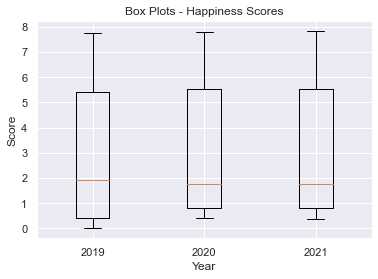

In [684]:
npdf19 = df19[df19.columns[1:]].to_numpy()
npdf20 = df20[df20.columns[1:]].to_numpy()
npdf21 = df21[df21.columns[1:]].to_numpy()
data = list([npdf19.flatten(), npdf20.flatten(), npdf21.flatten()])
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title('Box Plots - Happiness Scores')
ax.set_xlabel('Year')
ax.set_ylabel('Score')
xticklabels=['2019', '2020', '2021']
ax.set_xticklabels(xticklabels)
# Visualizing happiness scores with box plots 

In [687]:
g19 = sns.lmplot(x='Freedom',y='Score',data=df19,fit_reg=True)
g20 = sns.lmplot(x='Freedom',y='Score',data=df20,fit_reg=True)
g21 = sns.lmplot(x='Freedom',y='Score',data=df21,fit_reg=True)
plt.close()
plt.close()
plt.close()

In [688]:
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Freedom'], data['Score'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

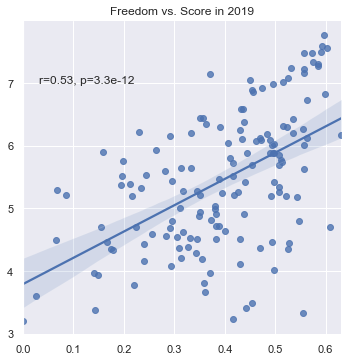

In [689]:
g19.map_dataframe(annotate)
plt.title('Freedom vs. Score in 2019')
plt.show()

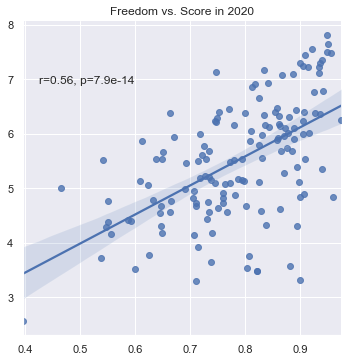

In [690]:
g20.map_dataframe(annotate)
plt.title('Freedom vs. Score in 2020')
plt.show()

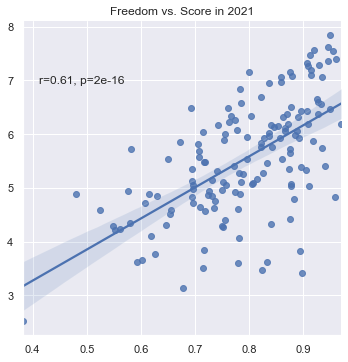

In [661]:
g21.map_dataframe(annotate)
plt.title('Freedom vs. Score in 2021')
plt.show()